## IMDB Sentiment Analysis
#### ( Part of coursera Deep-Learning w/ Tensorflow Specialization )

In [10]:
# !pip install tensorflow_datasets

In [1]:
import numpy as np

import  tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.2.0


In [2]:
imdb, info = tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [3]:
train_data , test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l)
    
for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l)
    
training_labels_final  = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok="<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)


testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)


In [5]:
# Create a reverse index to ease of lookup
reverse_word_index = dict([(value,key) for (key, value ) in word_index.items()])

# function that does the lookup and joins the words into a sentence
def decode_review(text):
    return ' '.join([reverse_word_index.get(word,'?') for word in text])

# Compare both
print(decode_review(padded[4]))
print(''.join(['-' for i in range(60)])) # Seperator
print(training_sentences[4])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? as others have mentioned all the women that go nude in this film are mostly absolutely gorgeous the plot very <OOV> shows the <OOV> of the female <OOV> when men are around they want to be pursued but when no men are around they become the <OOV> of a 14 year old boy and the boy becomes a man really fast we should all be so lucky at this age he then gets up the courage to pursue his true love
------------------------------------------------------------
As others have mentioned, all the women that go nude in this film are mostly absolutely gorgeous. The plot very ably shows the hypocrisy of the female libido. When men are around they want to be pursued, but when no "men" are around, they become the pursuers of a 14 year old boy. And the boy becomes a man really fast (we should all be so lucky at this age!). He then gets up the courage to pursue his true love.


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 10
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs,
          validation_data=(testing_padded,testing_labels_final)
         )

Epoch 1/10
782/782 [==============================] - 28s 35ms/step - loss: 0.5005 - accuracy: 0.7365 - val_loss: 0.3363 - val_accuracy: 0.8546
Epoch 2/10
782/782 [==============================] - 22s 28ms/step - loss: 0.2475 - accuracy: 0.9050 - val_loss: 0.3696 - val_accuracy: 0.8363
Epoch 3/10
782/782 [==============================] - 26s 33ms/step - loss: 0.1026 - accuracy: 0.9722 - val_loss: 0.4638 - val_accuracy: 0.8204
Epoch 4/10
782/782 [==============================] - 28s 36ms/step - loss: 0.0279 - accuracy: 0.9962 - val_loss: 0.5243 - val_accuracy: 0.8244
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 0.5833 - val_accuracy: 0.8255
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.6426 - val_accuracy: 0.8249
Epoch 7/10
782/782 [==============================] - 30s 38ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.6835 - val_accuracy:

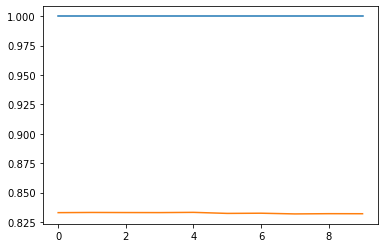

In [60]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = np.arange(0,num_epochs)

plt.plot(epochs, train_accuracy)
plt.plot(epochs, val_accuracy)
plt.show()

---
Change model to use GlobalAveragePooling1D inplace of Flatten

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs,
          validation_data=(testing_padded,testing_labels_final)
         )

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5382 - accuracy: 0.7608 - val_loss: 0.3761 - val_accuracy: 0.8448
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3254 - accuracy: 0.8653 - val_loss: 0.3294 - val_accuracy: 0.8590
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2649 - accuracy: 0.8926 - val_loss: 0.3319 - val_accuracy: 0.8570
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2291 - accuracy: 0.9117 - val_loss: 0.3477 - val_accuracy: 0.8525
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2030 - accuracy: 0.9235 - val_loss: 0.3765 - val_accuracy: 0.8450
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1818 - accuracy: 0.9336 - val_loss: 0.3989 - val_accuracy: 0.8409
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1659 - accuracy: 0.9404 - val_loss: 0.4337 - val_accuracy: 0.8352
Epoch 

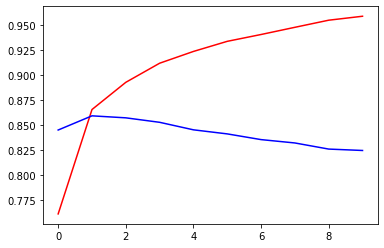

In [66]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = np.arange(0,num_epochs)

plt.plot(epochs, train_accuracy,color='r')
plt.plot(epochs, val_accuracy,color='b')
plt.show()

In [69]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [77]:
f_vecs = open('files/vecs.tsv','w')
f_meta = open('files/meta.tsv','w')

for word_num in range(1,vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    f_meta.write(word+"\n")
    f_vecs.write('\t'.join([str(x) for x in embeddings]) + "\n")

f_vecs.close()
f_meta.close()